# Problem sheet 2 - Moran Model

This is similar to the Wright-Fisher model from problem sheet 1 (expect continuous time). Population of $L$ individuals. 

Let $N_t = \sum_{i =1}^{L} \delta_{X_{t(i),k}}$ be the number of individuals of a single type, $k \in {1,...,L}$ at time $t$. Initially $N_0 =1 $ for all types. 

Recall, $ \frac{d}{dt} \mathbb{E}[f(N_t)] = \mathbb{E}[\mathcal{L}f(N_t)]$ - useful for part c

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We used am_done function for the wright fisher model

In [2]:
def am_done(v):
    '''Return true if all elements of v the same. Else false.'''
    u=np.unique(v) # unique  elements of v
    if u.shape[0]>1:
        return False
    else:
        return True

### Simulation:
- Run a process with rate $L$. 
- Waiting times are distributed exponentially with mean $\beta = 1/L$. 
- When an event occurs pick an individual uniform at random to reproduce and pick an individual uniform at random to be killed.

In [56]:
### Parameters ###

L=50
tmax=5000
deltat=0.1

#################

X=np.arange(L)   #initialize current state
Y=np.zeros((1,L),dtype='int') # initialize output array
Y[0,:]=X  

time=0.0
nextout=deltat

rate=L 
β=1.0/rate # mean wait time, uniformly picking 1/L individual at rate 1

while (time<tmax): # loop until done 
    while (time<nextout):
        wait=1/rate
        #wait=np.random.exponential(β) # wait time
        type_to_spread=np.random.choice(X) 
        idx=np.random.choice(np.arange(L))
        X[idx]=type_to_spread # infect    
        X=np.sort(X)  
        time+=wait

    Y=np.append(Y,[X],axis=0)
    nextout+=deltat
        
    if(am_done(X)):
        time=tmax+1.


Text(69.0, 0.5, 'Time/$\\Delta t$')

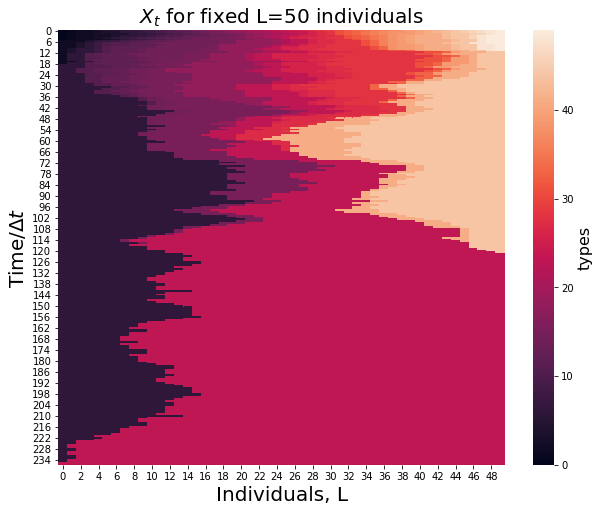

In [57]:
plt.figure(figsize = (10,8))
pcm = sns.heatmap(Y,cbar_kws={'label': 'types'.format(L)})
pcm.figure.axes[-1].yaxis.label.set_size(16)
plt.title('$X_t$ for fixed L={} individuals'.format(L), fontsize = 20)
plt.xlabel('Individuals, L', fontsize = 20)
plt.ylabel('Time/$\Delta t$', fontsize = 20)

In [58]:
start_times=np.arange(np.shape(Y)[0])*deltat

In [59]:
def X_to_N(X):
    N=np.zeros_like(X)
    length=np.shape(N)[0]
    L=np.shape(N)[1]
    for row in range(length):
        row_list=list(X[row,:])
        for i in range(L):
            N[row,i]=row_list.count(i)   
    return N

In [60]:
N=X_to_N(Y)

Text(0.5, 1.0, '$N_t$ Number of individuals of each species \n out of total population size L = 50')

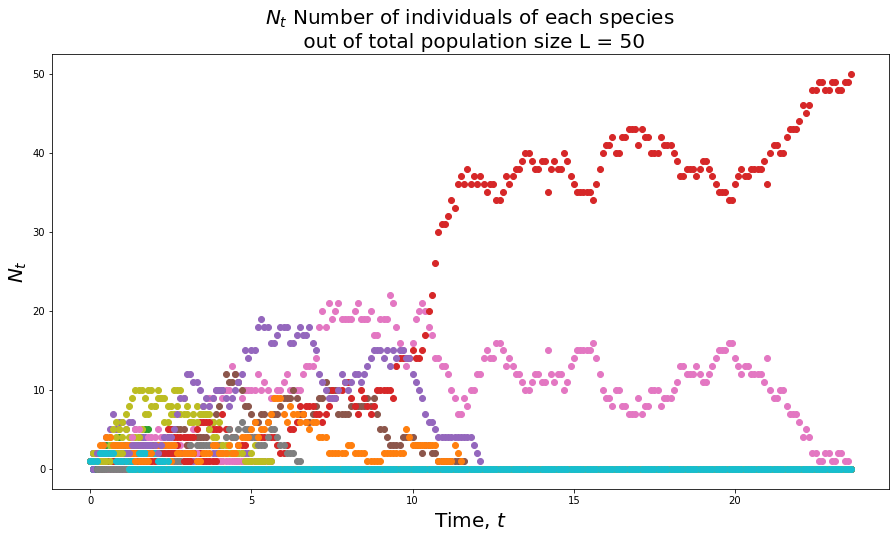

In [61]:
plt.figure(figsize = (15,8))
for i in range(L):
    plt.plot(start_times,N[:,i],'o')
    
plt.xlabel('Time, $t$', fontsize = 20)
plt.ylabel('$N_t$', fontsize= 20)

plt.title("$N_t$ Number of individuals of each species \n out of total population size L = {}".format(L), fontsize = 20)